In [1]:
import pickle
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.decomposition import NMF
from scipy.interpolate import griddata
import math
import matplotlib.image
import cv2 as cv2
from PIL import Image
from sklearn.metrics import roc_auc_score

In [2]:
def load_pickle(filename, verbose=True):
    with open(filename, 'rb') as file:
        x = pickle.load(file)
    return x

def normalization(data):
    _range = (np.max(data) - np.min(data) ) + 1e-6
    return (data - np.min(data)) / _range

def read_lines(filename):
    with open(filename, 'r') as file:
        lines = [line.rstrip() for line in file]
    return lines

In [8]:
gene_names = read_lines("brain_cancer/gene-names.txt")

In [5]:
d1 = "UNI-unfiltered"
d2 = "UNI-filtered-slide-1"
d3 = "UNI-filtered-slide-2"

In [19]:
#import numpy as np
#将图片转换为矩阵
from skimage.metrics import structural_similarity as ssim

# gene_names.remove("EPCAM")
# gene_names.remove("KRAS")
result = np.zeros((len(gene_names),12))
idx = 0
better_rmse_1 = 0
better_rmse_2 = 0
better_rmse_3 = 0
better_list = []
better_ssim_1 = 0
better_ssim_2 = 0
better_ssim_3 = 0
list = []

for idx in range(len(gene_names)):
    gene = gene_names[idx]

    truth = cv2.imread(f'brain_cancer/Truth/cnts-super-plots/{gene}.png', cv2.IMREAD_GRAYSCALE)
    istar = cv2.imread('brain_cancer/' + d1 + f'/cnts-super-plots/{gene}.png', cv2.IMREAD_GRAYSCALE)
    predicted = cv2.imread('brain_cancer/' + d2 + f'/cnts-super-plots/{gene}.png', cv2.IMREAD_GRAYSCALE)
    nmf = cv2.imread('brain_cancer/' + d3 + f'/cnts-super-plots/{gene}.png', cv2.IMREAD_GRAYSCALE)
    
    '''
    truth = load_pickle(f'breast/Truth-cnts/{gene}.pickle')
    istar = load_pickle('breast/'+d1+f'/cnts-super/{gene}.pickle')
    predicted = load_pickle('breast/'+d2+f'/cnts-super/{gene}.pickle')
    nmf = load_pickle('breast/'+d3+f'/cnts-super/{gene}.pickle')
    '''
    
    truth = np.nan_to_num(truth[:1463,:])
    nmf = np.nan_to_num(nmf[:1463,:])
    istar = np.nan_to_num(istar[:1463,:])
    predicted = np.nan_to_num(predicted[:1463,:])
    
    truth_exp = np.sum(truth)
    predicted_exp = np.sum(predicted)
    nmf_exp = np.sum(nmf)
    
    truth = normalization(truth)
    istar = normalization(istar)
    predicted = normalization(predicted)
    nmf = normalization(nmf)
    
    rmse_pre = math.sqrt((np.square(predicted - truth)).mean(axis=None))
    rmse_nmf = math.sqrt((np.square(truth - nmf)).mean(axis=None))
    
    # pcc_pred = np.corrcoef(predicted.flatten(), truth.flatten())[0,1]
    # pcc_nmf = np.corrcoef(nmf.flatten(), truth.flatten())[0,1]
    # pcc_istar = np.corrcoef(istar.flatten(), truth.flatten())[0,1]
    
    ssim_pre= ssim(truth*255,predicted*255,data_range=255)
    ssim_nmf= ssim(truth*255,nmf*255,data_range=255)
    ssim_istar = ssim(truth*255,istar*255,data_range=255)
    rmse_istar = math.sqrt((np.square(istar - truth)).mean(axis=None))
    result[idx, 1] = truth_exp
    result[idx, 3] = rmse_pre
    result[idx, 4] = rmse_nmf
    result[idx, 5] = rmse_istar
    result[idx, 6] = ssim_nmf
    result[idx, 7] = ssim_pre
    result[idx, 8] = ssim_istar
    # result[idx, 9] = pcc_nmf
    # result[idx, 10] = pcc_pred
    # result[idx, 11] = pcc_istar
    comparison = gene + ',' + str(rmse_pre) + ',' + str(rmse_nmf)
    if rmse_pre < rmse_istar:
        better_rmse_1 += 1
    if rmse_nmf < rmse_istar:
        better_rmse_2 += 1
    if rmse_nmf < rmse_pre:
        better_rmse_3 += 1
    if ssim_pre > ssim_istar:
        better_ssim_1 += 1
    if ssim_nmf > ssim_istar:
        better_ssim_2 += 1
    if ssim_nmf > ssim_pre:
        better_ssim_3 += 1
        print(gene)
    if ssim_pre < ssim_istar:
        a = []
        a.append(gene)
        a.append(ssim_istar)
        a.append(ssim_pre)
        list.append(a)
    idx += 1

S100B
EGFR
PTN
SLC1A3
GATM
EDNRB
NCAM1
FEZ1
SOX9
ID4
STMN1
SOCS2
C1QBP
RGS5
LAMP2
PDGFRA
TCF4
KMT2C
TP53
IL1RAP
ARID1A
STAT1
AKT1
ISG15
CDK6
CDKN2C
ACTA2
MX1
COTL1
SOCS3
VSIG4
NF1
STAT5B
TXLNA
CENPF
ITGA1
IFIT3
ATM
RIDA
ERBB2
HLA-B
NT5E
XBP1
GLIPR2
BRAF
PLVAP
CDK12
ERBB4
CDKN1A
UBE2C
CDK2
CD38
FGF2
JAK2
IRF2
PIK3CA
IFIT2
PSMB10
DCN
CENPV
NELL2
CXCL11
KIT
ORC6
FADD
ERBB3
TOX
KLRK1
RTKN2
ADAMTS1
FKBP11
DGKA
FBLN1
CXCL3
JAK3
DIRAS3
FCGR2B
TNFRSF13C
CCL2
FABP3
CXCL9
IL13RA2
PTPRC
EGR3
HIGD1B
MMRN1
NCEH1
RAMP2
SDC1
EDN1
MMP9
SFRP4
FGFBP2
GEM
LY6E
SPON2
BATF3
CXCR4
JUNB
IL1R1
CD2
FHIT
LILRA4
ITGAE
S100A12
GDF15
CD274
CTSS
CDKN1C
PRF1
IL7R
CXCR2
DUSP2
CDKN2D
CD8A
ACKR1
TCF7
FCMR
CXCL5
CXCL6
ANPEP
C1orf194
IRF3
RUNX3
SOX17
CAVIN2
CDKN2B
KRT7
CD3E
CCL4
FHL2
PCP4
CD40
FOS
NOSIP
GNLY
CXCL2
SOCS1
IGF1
IL2RA
EPO
BANK1
TRAC
G0S2
GPR183
IL2RB
DERL3
KLRF1
NKG7
CD80
CXCR1
GZMK
LAMP3
IL2
GZMA
CD247
IL6
TIGIT
AQP3
HPX
IL1A
CCR5
STAT4
EPCAM
CD8B
CTLA4
CCL3
CD3D
PLAC9
GPC3
KLRB1
IL15RA
SFRP2
ACE2
TMPRSS2
C

In [19]:
for i in range(result.shape[0]):
    if result[i,6] - result[i,7] > 0.05:
        print(gene_names[i], result[i,6], result[i,7], result[i,8])

STC1 0.6710989772920711 0.4256181176922837 0.6262418189990744
CCL8 0.7007872778562025 0.5006618095758496 0.69764684238672
LIF 0.7813269147386663 0.7128625075930816 0.7691319140853239
DNAAF1 0.2882818732121824 0.1150712386918129 0.12327102862645381


In [20]:
np.min(result[:,1]), np.max(result[:,1]), np.median(result[:,1])

(196582796.0, 302030946.0, 198425336.0)

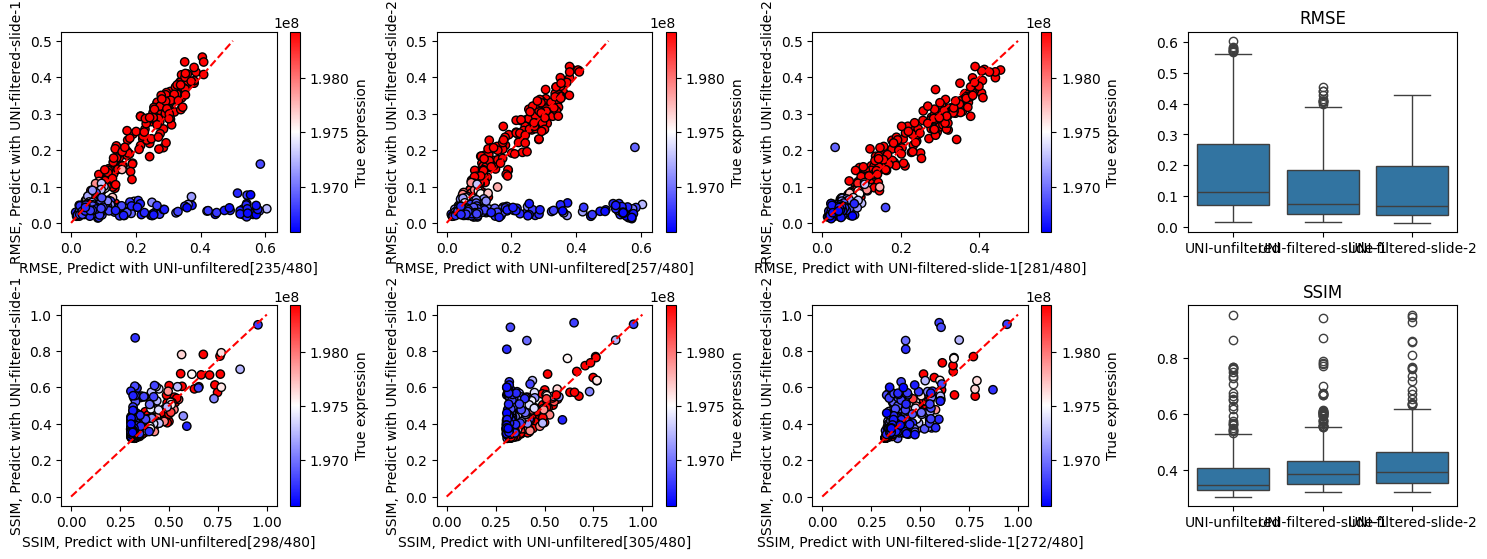

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
def show_scatter(matrix):
    fig = plt.figure(figsize=(15,8), dpi=100)
    ax1=plt.subplot(341)
    sc1 = ax1.scatter(np.array(matrix[:,5]), np.array(matrix[:,3]), c=matrix[:,1], cmap='bwr', edgecolors='k',vmax = np.median(matrix[:,1]))
    # plt.axhline(0.95,color='red',linestyle='--')
    plt.plot([0,0.5],[0,0.5],color='red',linestyle='--')
    plt.xlabel('RMSE, Predict with ' + d1 + '[' + str(better_rmse_1) + "/" + str(len(gene_names)) + ']')
    # plt.xlim([0,0.4])
    plt.ylabel('RMSE, Predict with ' + d2)
    plt.colorbar(sc1, label="True expression")

    ax2=plt.subplot(342)
    sc2 = ax2.scatter(np.array(matrix[:,5]), np.array(matrix[:,4]), c=matrix[:,1], cmap='bwr', edgecolors='k',vmax = np.median(matrix[:,1]))
    # plt.axhline(0.95,color='red',linestyle='--')
    plt.plot([0,0.5],[0,0.5],color='red',linestyle='--')
    plt.xlabel('RMSE, Predict with ' + d1 + '[' + str(better_rmse_2) + "/" + str(len(gene_names)) + ']')
    # plt.xlim([0,0.4])
    plt.ylabel('RMSE, Predict with ' + d3)
    plt.colorbar(sc2, label="True expression")

    ax3=plt.subplot(343)
    sc3 = ax3.scatter(np.array(matrix[:,3]), np.array(matrix[:,4]), c=matrix[:,1], cmap='bwr', edgecolors='k',vmax = np.median(matrix[:,1]))
    # plt.axhline(0.95,color='red',linestyle='--')
    plt.plot([0,0.5],[0,0.5],color='red',linestyle='--')
    plt.xlabel('RMSE, Predict with ' + d2 + '[' + str(better_rmse_3) + "/" + str(len(gene_names)) + ']')
    # plt.xlim([0,0.4])
    plt.ylabel('RMSE, Predict with ' + d3)
    plt.colorbar(sc3, label="True expression")
    
    ax4=plt.subplot(345)
    sc4 = ax4.scatter(np.array(matrix[:,8]), np.array(matrix[:,7]), c=matrix[:,1], cmap='bwr', edgecolors='k',vmax = np.median(matrix[:,1]))
    # plt.axhline(0.95,color='red',linestyle='--')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.xlabel('SSIM, Predict with ' + d1 + '[' + str(better_ssim_1) + "/" + str(len(gene_names)) + ']')
    # plt.xlim([0,0.25])
    plt.ylabel('SSIM, Predict with ' + d2)
    plt.colorbar(sc4, label="True expression")

    ax5=plt.subplot(346)
    sc5 = ax5.scatter(np.array(matrix[:,8]), np.array(matrix[:,6]), c=matrix[:,1], cmap='bwr', edgecolors='k',vmax = np.median(matrix[:,1]))
    # plt.axhline(0.95,color='red',linestyle='--')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.xlabel('SSIM, Predict with ' + d1 + '[' + str(better_ssim_2) + "/" + str(len(gene_names)) + ']')
    # plt.xlim([0,0.25])
    plt.ylabel('SSIM, Predict with ' + d3)
    plt.colorbar(sc5, label="True expression")

    ax6=plt.subplot(347)
    sc6 = ax6.scatter(np.array(matrix[:,7]), np.array(matrix[:,6]), c=matrix[:,1], cmap='bwr', edgecolors='k',vmax = np.median(matrix[:,1]))
    # plt.axhline(0.95,color='red',linestyle='--')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.xlabel('SSIM, Predict with ' + d2 + '[' + str(better_ssim_3) + "/" + str(len(gene_names)) + ']')
    # plt.xlim([0,0.25])
    plt.ylabel('SSIM, Predict with ' + d3)
    plt.colorbar(sc6, label="True expression")

    ax6=plt.subplot(344)
    df = pd.DataFrame({
    d1: result[:,5],
    d2: result[:, 3],
    d3: result[:, 4]})

    df_melt = df.melt(var_name='Column', value_name='Value')
    
    sns.boxplot(x='Column', y='Value', data=df_melt)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('RMSE')

    ax6=plt.subplot(348)
    df = pd.DataFrame({
    d1: result[:, 8],
    d2: result[:, 7],
    d3: result[:, 6]})

    df_melt = df.melt(var_name='Column', value_name='Value')
    
    sns.boxplot(x='Column', y='Value', data=df_melt)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('SSIM')
    plt.tight_layout()

    plt.savefig('Results/Brain_cancer-' + d1 + '-' + d2 + '-' + d3 + '.png')
    plt.show()

show_scatter(result)

In [13]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

def compare_images(img1_path, img2_path):
    # 加载图像为灰度图
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    img1 = img1[:1463,:]
    img2 = img2[:1463,:]
    
    # 检查图像大小是否一致
    if img1.shape != img2.shape:
        raise ValueError("两个图像大小不一致")

    # 计算指标
    mse_val = mse(img1, img2)
    ssim_val = ssim(img1, img2)
    psnr_val = psnr(img1, img2)

    print(f"MSE:  {mse_val:.4f}")
    print(f"SSIM: {ssim_val:.4f}")
    print(f"PSNR: {psnr_val:.2f} dB")

    return mse_val, ssim_val, psnr_val


In [18]:
compare_images('/root/autodl-tmp/Prime/brain_cancer/UNI-unfiltered/cnts-super-plots/S100B.png', 
               '/root/autodl-tmp/Prime/brain_cancer/Truth/cnts-super-plots/S100B.png'),
compare_images('/root/autodl-tmp/Prime/brain_cancer/UNI-filtered-slide-2/cnts-super-plots/S100B.png', 
               '/root/autodl-tmp/Prime/brain_cancer/Truth/cnts-super-plots/S100B.png')

MSE:  2316.1974
SSIM: 0.4614
PSNR: 14.48 dB
MSE:  3114.8463
SSIM: 0.4787
PSNR: 13.20 dB


(3114.8463259406635, 0.4787315234139258, 13.196437356968927)

In [ ]:
A = pd.DataFrame(list)

In [ ]:
for i in list:
    if i[1] - i[2] > 0.1:
        print(i)

In [34]:
import pandas as pd

# 1. 读取两个 CSV 文件
df1 = pd.read_csv("/root/autodl-tmp/scstGCN-main/data/nmf.csv", index_col=0)           # 文件1读取 :contentReference[oaicite:3]{index=3}
df2 = pd.read_csv("/root/autodl-tmp/scstGCN-main/data/cnts.csv", index_col=0)           # 文件2读取 :contentReference[oaicite:4]{index=4}
df3 = pd.read_csv("/root/autodl-tmp/scstGCN-main/data/cnts_full.csv", index_col=0)   

In [35]:
# 2. 按行拼接（纵向合并），并忽略原索引，生成新索引
df_concat = pd.concat([df1, df2], axis=0, ignore_index=False)  # axis=0 表示行拼接 :contentReference[oaicite:5]{index=5}

In [36]:
df1.shape, df2.shape, df3.shape

((3080, 33), (3080, 480), (6327, 480))

In [37]:
df_concat[:10]

,Astrocyte,B_cell,BM...Prog.,Chondrocytes,CMP,DC,Embryonic_stem_cells,Endothelial_cells,Epithelial_cells,Erythroblast,...,UBE2C,UMOD,UPK3B,VCAN,VEGFA,VSIG4,VSIR,VWA5A,XBP1,ZNF683
68X1,0.000035,0.032292,0.001143,0.000035,0.004086,0.025440,0.000035,0.231972,0.034489,0.000035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74X1,0.000035,0.033033,0.000035,0.000035,0.005355,0.014388,0.000035,0.000035,0.000035,0.000035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92X1,0.000049,0.035083,0.000049,0.000049,0.001116,0.071257,0.000049,0.083446,0.000049,0.000049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94X1,0.043804,0.070480,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.115155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67X2,0.044118,0.028985,0.000070,0.005651,0.000070,0.011718,0.000070,0.040013,0.159557,0.077753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69X2,0.000049,0.060941,0.000476,0.000049,0.000049,0.086468,0.000049,0.033212,0.000049,0.033739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89X2,0.000070,0.012005,0.006807,0.000070,0.000070,0.079378,0.000070,0.000070,0.000070,0.063821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91X2,0.023341,0.028488,0.104219,0.000070,0.004966,0.028498,0.000070,0.017635,0.000070,0.000070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93X2,0.019307,0.039470,0.026002,0.000049,0.018164,0.078221,0.000053,0.059422,0.000049,0.059542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94X2,0.042781,0.024142,0.008473,0.000049,0.000049,0.000049,0.000049,0.042611,0.000049,0.049782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# 3. 将拼接结果保存为新的 CSV 文件（不保存行索引）
df_
df_concat.to_csv("/root/autodl-tmp/scstGCN-main/data/cnts_ext.csv", index=True)            # 保存为 CSV :contentReference[oaicite:6]{index=6}

In [ ]:
df_concat.shape

In [22]:
A = load_pickle("/root/autodl-tmp/Prime/brain_cancer/embeddings-hist-merged.pickle")

EOFError: Ran out of input